# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

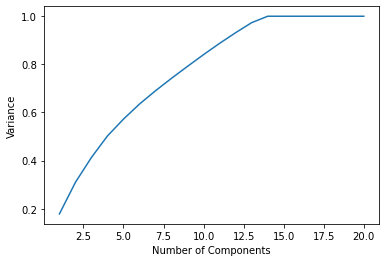

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


num_components = range(1, len(X_train.columns)+1)

variances = []


for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    variances.append(sum(pca.explained_variance_ratio_))

plt.plot(num_components, variances)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.show()


- From the plot we can say that variance is pretty low if no.of components is less than 10 
- If the number of components is 13 then this explains variance above 85% which is good for the model to understand the data

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

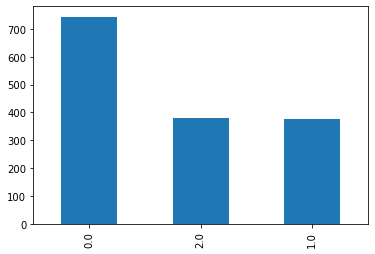

In [6]:
df['target'].value_counts().plot.bar()
plt.show()

- The given data set is imbalanced which means accuracy is not the good metric to measure
- Usually the metric to measure the model performance is decided based on the problem statement, but in this case since is problem statement is unknown F1 score is the best metric to measure model performance for imbalance datasets

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_training)

LogisticRegression()

In [8]:
from sklearn.metrics import classification_report
print('Scores on Testing Data\n')
predictions_test = model.predict(X_test)
testing_score = classification_report(y_test, predictions_test)
print(testing_score)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



- The performance of the orginal Logestic model is not bad but when it is integrated with the PCA it gives the best results

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [9]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('pca', PCA(n_components=13)), 
    ('lr', LogisticRegression()) 
])

pipeline.fit(X_train_scaled, y_training)

Pipeline(steps=[('pca', PCA(n_components=13)), ('lr', LogisticRegression())])

In [10]:
X_test_scaled = scaler.transform(X_test)
print('Scores on Testing Data\n')
predictions_test_pipe = pipeline.predict(X_test_scaled)
testing_score_pipe = classification_report(y_test, predictions_test_pipe)
print(testing_score_pipe)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       153
         1.0       0.68      0.59      0.63        74
         2.0       0.65      0.68      0.67        73

    accuracy                           0.71       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.71      0.71      0.71       300



- Logestic model with PCA performed better than the orginal Logestic model
- The F1 scores of each of the class of the Logestic model with PCA has a bit higher values than the orginal Logestic model  

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_training)


DecisionTreeClassifier()

In [12]:
print('Scores on Testing Data\n')
predictions_test_tree = tree.predict(X_test)
testing_score_tree = classification_report(y_test, predictions_test_tree)
print(testing_score_tree)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       153
         1.0       0.54      0.69      0.60        74
         2.0       0.66      0.70      0.68        73

    accuracy                           0.68       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.70      0.68      0.68       300



- Orginal decission tree model did not perform well than orginal Logestic model and Logestic model integrated with PCA
- The F1 scores are low than the other models. Even the precission recall scores are also not impressive
- Decission tree did not perform wel than Logestic regression

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [13]:
pipeline = Pipeline([
    ('pca', PCA(n_components=13)), 
    ('tree', DecisionTreeClassifier())  
])

pipeline.fit(X_train_scaled, y_training)

Pipeline(steps=[('pca', PCA(n_components=13)),
                ('tree', DecisionTreeClassifier())])

In [14]:
print('Scores on Testing Data\n')
predictions_test_pipe_tree = pipeline.predict(X_test_scaled)
testing_score_pipe_tree = classification_report(y_test, predictions_test_pipe_tree)
print(testing_score_pipe_tree)

Scores on Testing Data

              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       153
         1.0       0.55      0.51      0.53        74
         2.0       0.55      0.63      0.59        73

    accuracy                           0.63       300
   macro avg       0.60      0.61      0.61       300
weighted avg       0.63      0.63      0.63       300



- This model performed worst than any other models as it scores are very low
- Decission tree integrated with PCA performed poor than the orginal model
- Adding grid searchcv to the pipeline might increase the score 